In [16]:
install.packages("Quandl", repos = "http://cran.us.r-project.org")
install.packages("tseries", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'Quandl' is in use and will not be installed"Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpMJgOV8\downloaded_packages


In [1]:
# Quandl package must be installed
library(Quandl)
 
# Get your API key from quandl.com
quandl_api = "2ypzeYdSyDLTr3wxjG5H"
 
# Add the key to the Quandl keychain
Quandl.api_key(quandl_api)
 
quandl_get <-
function(sym, start_date = "2016-01-01") {
    require(devtools)
    require(Quandl)
    # create a vector with all lines
    tryCatch(Quandl(c(
        paste0("WIKI/", sym, ".8"),  #  Adj. Open
        paste0("WIKI/", sym, ".9"),  # Adj. High
        paste0("WIKI/", sym, ".10"), # Adj. Low
        paste0("WIKI/", sym, ".11"), # Adj. Close
        paste0("WIKI/", sym, ".12")), # Adj. Volume
        start_date = start_date,
        type = "zoo"
        ))
}

Warning message:
"package 'Quandl' was built under R version 3.4.4"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [62]:
data = new.env()
data.google = quandl_get('GOOGL', '2017-01-01')[, 4]
data.microsoft = quandl_get('MSFT', '2017-01-01')[, 4]
data.amazon = quandl_get('AMZN', '2017-01-01')[, 4]
data.facebook = quandl_get('FB', '2017-01-01')[, 4]
data.mcdonalds = quandl_get('MCD', '2017-01-01')[, 4]
data.apple = quandl_get('AAPL', '2017-01-01')[, 4]
data.walmart = quandl_get('WMT', '2017-01-01')[, 4]
data.jpm = quandl_get('JPM', '2017-01-01')[, 4]
data.ibm = quandl_get('IBM', '2017-01-01')[, 4]
data.csco = quandl_get('CSCO', '2017-01-01')[, 4]
data.intel = quandl_get('INTC', '2017-01-01')[, 4]
data.nvidia = quandl_get('NVDA', '2017-01-01')[, 4]
data.hp = quandl_get('HPE', '2017-01-01')[, 4]
data.tesla = quandl_get('TSLA', '2017-01-01')[, 4]

In [63]:
length(data.google)
length(data.microsoft)
length(data.mcdonalds)
length(data.walmart)
length(data.jpm)
length(data.ibm)
length(data.csco)
length(data.intel)
length(data.facebook)
length(data.amazon)
length(data.apple)
length(data.nvidia)
length(data.hp)
length(data.tesla)

[1] 309

[1] 309

[1] 309

[1] 309

[1] 309

[1] 309

[1] 309

[1] 308

[1] 309

[1] 308

[1] 308

[1] 309

[1] 309

[1] 309

In [64]:
price = data.frame(matrix(nrow = 309))
price['google'] = data.google
price['microsoft'] = data.microsoft
price['mcdonalds'] = data.mcdonalds
price['walmart'] = data.walmart
price['jpm'] = data.jpm
price['ibm'] = data.ibm
price['csco'] = data.csco
price['facebook'] = data.facebook
price['nvidia'] = data.nvidia
price['hp'] = data.hp
price['tesla'] = data.tesla

In [65]:
price = price[ -c(1) ]
names(price)

[1] "google"    "microsoft" "mcdonalds" "walmart"   "jpm"       "ibm"      
 [7] "csco"      "facebook"  "nvidia"    "hp"        "tesla"

In [66]:
cor(price)

,google,microsoft,mcdonalds,walmart,jpm,ibm,csco,facebook,nvidia,hp,tesla
google,1.0000000,0.9491894,0.8740779,0.9091312,0.86664396,-0.28816247,0.8097746,0.8929992,0.9272735,-0.6321287,0.5837716
microsoft,0.9491894,1.0000000,0.8225168,0.9147665,0.95206549,-0.21841978,0.8965906,0.8901251,0.9646807,-0.5870747,0.4778503
mcdonalds,0.8740779,0.8225168,1.0000000,0.8831978,0.70642427,-0.54771675,0.5480948,0.9444649,0.8583111,-0.8692034,0.7315974
walmart,0.9091312,0.9147665,0.8831978,1.0000000,0.86428195,-0.22914244,0.7703155,0.8852665,0.8779419,-0.6881391,0.4882386
jpm,0.8666440,0.9520655,0.7064243,0.8642820,1.00000000,-0.02011917,0.9361100,0.7942768,0.8977657,-0.4265114,0.3170930
ibm,-0.2881625,-0.2184198,-0.5477167,-0.2291424,-0.02011917,1.00000000,0.1181497,-0.4841171,-0.3500876,0.6662439,-0.6961876
csco,0.8097746,0.8965906,0.5480948,0.7703155,0.93611000,0.11814969,1.0000000,0.6599752,0.7924949,-0.2664204,0.2167179
facebook,0.8929992,0.8901251,0.9444649,0.8852665,0.79427677,-0.48411708,0.6599752,1.0000000,0.9106611,-0.7948340,0.6931236
nvidia,0.9272735,0.9646807,0.8583111,0.8779419,0.89776567,-0.35008758,0.7924949,0.9106611,1.0000000,-0.6503433,0.5666054
hp,-0.6321287,-0.5870747,-0.8692034,-0.6881391,-0.42651139,0.66624392,-0.2664204,-0.7948340,-0.6503433,1.0000000,-0.7367489


In [67]:
log_price = log(price)
cor(log_price)

,google,microsoft,mcdonalds,walmart,jpm,ibm,csco,facebook,nvidia,hp,tesla
google,1.0000000,0.9504720,0.8874278,0.9180377,0.85162668,-0.31252438,0.7957302,0.8975590,0.9209743,-0.6360774,0.6292898
microsoft,0.9504720,1.0000000,0.8435127,0.9300088,0.94180550,-0.24742197,0.8799109,0.9003050,0.9482152,-0.6129976,0.5331772
mcdonalds,0.8874278,0.8435127,1.0000000,0.8923615,0.70700483,-0.56567819,0.5554709,0.9499458,0.8923596,-0.8609612,0.7729347
walmart,0.9180377,0.9300088,0.8923615,1.0000000,0.86396682,-0.26435284,0.7787820,0.8958229,0.8824326,-0.7098585,0.5485191
jpm,0.8516267,0.9418055,0.7070048,0.8639668,1.00000000,-0.02482607,0.9284533,0.7891632,0.8586315,-0.4395793,0.3442771
ibm,-0.3125244,-0.2474220,-0.5656782,-0.2643528,-0.02482607,1.00000000,0.1294585,-0.5012195,-0.4245791,0.6307144,-0.6916916
csco,0.7957302,0.8799109,0.5554709,0.7787820,0.92845334,0.12945853,1.0000000,0.6592584,0.7249948,-0.2761871,0.2476367
facebook,0.8975590,0.9003050,0.9499458,0.8958229,0.78916322,-0.50121948,0.6592584,1.0000000,0.9199158,-0.7948138,0.7363791
nvidia,0.9209743,0.9482152,0.8923596,0.8824326,0.85863152,-0.42457907,0.7249948,0.9199158,1.0000000,-0.6934169,0.6401884
hp,-0.6360774,-0.6129976,-0.8609612,-0.7098585,-0.43957929,0.63071443,-0.2761871,-0.7948138,-0.6934169,1.0000000,-0.7156250


In [68]:
# Compute all possible models
all_possible_first_order_models = new.env()
all_possible_first_order_models.google = olsrr::ols_step_all_possible(lm(google ~ (tesla + nvidia + hp + facebook + microsoft + mcdonalds + walmart + jpm + ibm + csco), data = log_price))

all_possible_first_order_models.google

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
5,1,1,microsoft,0.90339711,0.90308244,0.9021650,358.1120,-1260.2730,-2139.883,-1249.0730,0.0009850079,0.0009849665,0.09786156,3.198145e-06
2,2,1,nvidia,0.84819367,0.84769918,0.8461348,737.0455,-1120.6060,-2001.314,-1109.4060,0.0015478878,0.0015478228,0.15378427,5.025715e-06
7,3,1,walmart,0.84279328,0.84228120,0.8409246,774.1154,-1109.8046,-1990.582,-1098.6046,0.0016029527,0.0016028853,0.15925502,5.204501e-06
4,4,1,facebook,0.80561209,0.80497890,0.8034244,1029.3386,-1044.2057,-1925.364,-1033.0057,0.0019820694,0.0019819861,0.19692065,6.435425e-06
6,5,1,mcdonalds,0.78752809,0.78683600,0.7854616,1153.4727,-1016.7189,-1898.018,-1005.5189,0.0021664622,0.0021663711,0.21524027,7.034116e-06
8,6,1,jpm,0.72526801,0.72437311,0.7216599,1580.8451,-937.3101,-1818.957,-926.1101,0.0028012949,0.0028011772,0.27831156,9.095305e-06
10,7,1,csco,0.63318659,0.63199176,0.6291628,2212.9203,-847.9915,-1729.944,-836.7914,0.0037401998,0.0037400426,0.37159273,1.214376e-05
3,8,1,hp,0.40459443,0.40265499,0.3984413,3782.0475,-698.3151,-1580.626,-687.1151,0.0060710316,0.0060707764,0.60316330,1.971156e-05
1,9,1,tesla,0.39600561,0.39403820,0.3897807,3841.0038,-693.8896,-1576.208,-682.6895,0.0061586072,0.0061583483,0.61186403,1.999590e-05
9,10,1,ibm,0.09767149,0.09473231,0.0863938,5888.8612,-569.8527,-1452.363,-558.6527,0.0092005603,0.0092001736,0.91408524,2.987258e-05


In [69]:
# select model with max adjusted r^2, lowest aic, and lowest bic
which.max(all_possible_first_order_models.google$adjr)
which.min(all_possible_first_order_models.google$aic)
which.min(all_possible_first_order_models.google$sbic)

[1] 1013

[1] 968

[1] 968

In [75]:
all_possible_first_order_models.google[968, ]

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
999,968,8,tesla hp facebook microsoft mcdonalds jpm ibm csco,0.9563375,0.9551732,0.9530919,8.712778,-1491.656,-2368.004,-1454.323,0.0004662571,0.0004658259,0.04628224,1.513853e-06


In [76]:
models = new.env()
models.google_optimal = lm(google ~ tesla + hp + facebook + microsoft + mcdonalds + jpm + ibm + csco, data = log_price)
summary(models.google_optimal)
models.google_optimal.residuals = resid(models.google_optimal)


Call:
lm(formula = google ~ tesla + hp + facebook + microsoft + mcdonalds + 
    jpm + ibm + csco, data = log_price)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.082966 -0.014459  0.001897  0.015375  0.042206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.54875    0.26827   5.773 1.94e-08 ***
tesla        0.05917    0.01890   3.130  0.00192 ** 
hp           0.13924    0.01622   8.584 5.04e-16 ***
facebook    -0.12271    0.04397  -2.791  0.00560 ** 
microsoft    0.70659    0.05298  13.336  < 2e-16 ***
mcdonalds    0.55529    0.04355  12.749  < 2e-16 ***
jpm         -0.38365    0.04812  -7.973 3.29e-14 ***
ibm          0.16503    0.03589   4.598 6.29e-06 ***
csco         0.08430    0.03896   2.163  0.03129 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02128 on 300 degrees of freedom
Multiple R-squared:  0.9563,	Adjusted R-squared:  0.9552 
F-statistic: 821.4 on 8 and 300 DF,  p

In [77]:
tseries::adf.test(models.google_optimal.residuals)


	Augmented Dickey-Fuller Test

data:  models.google_optimal.residuals
Dickey-Fuller = -3.0908, Lag order = 6, p-value = 0.1165
alternative hypothesis: stationary


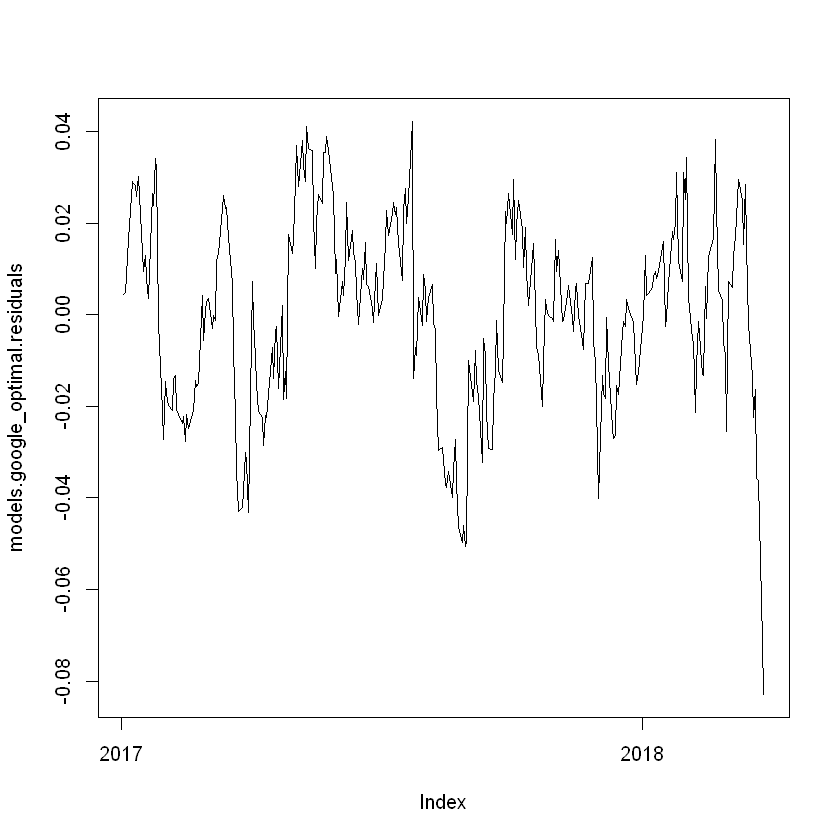

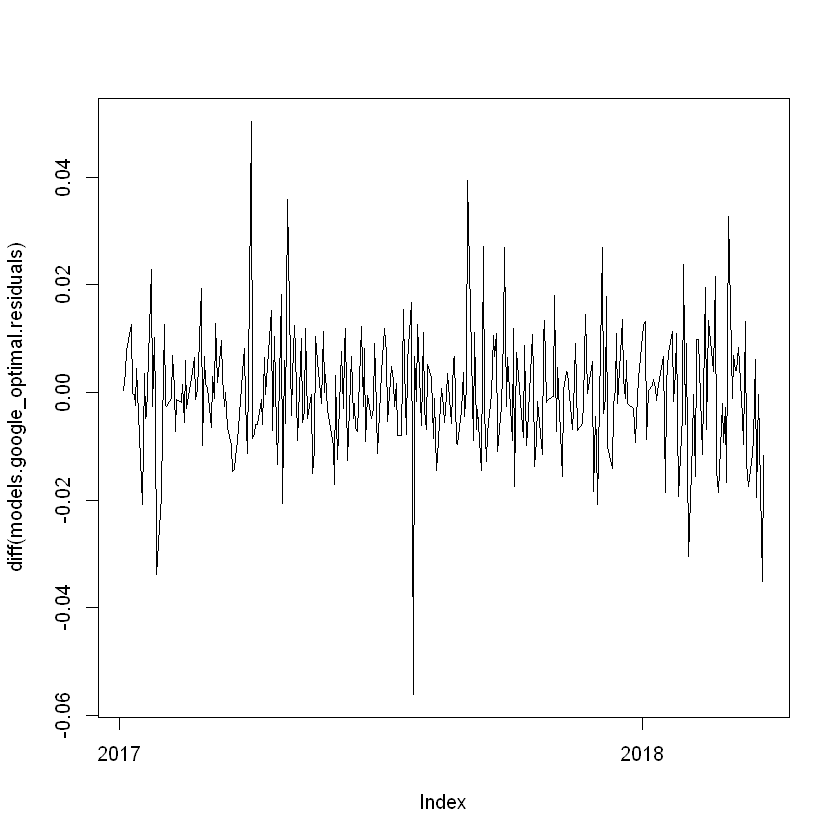

In [78]:
plot(models.google_optimal.residuals)
plot(diff(models.google_optimal.residuals))

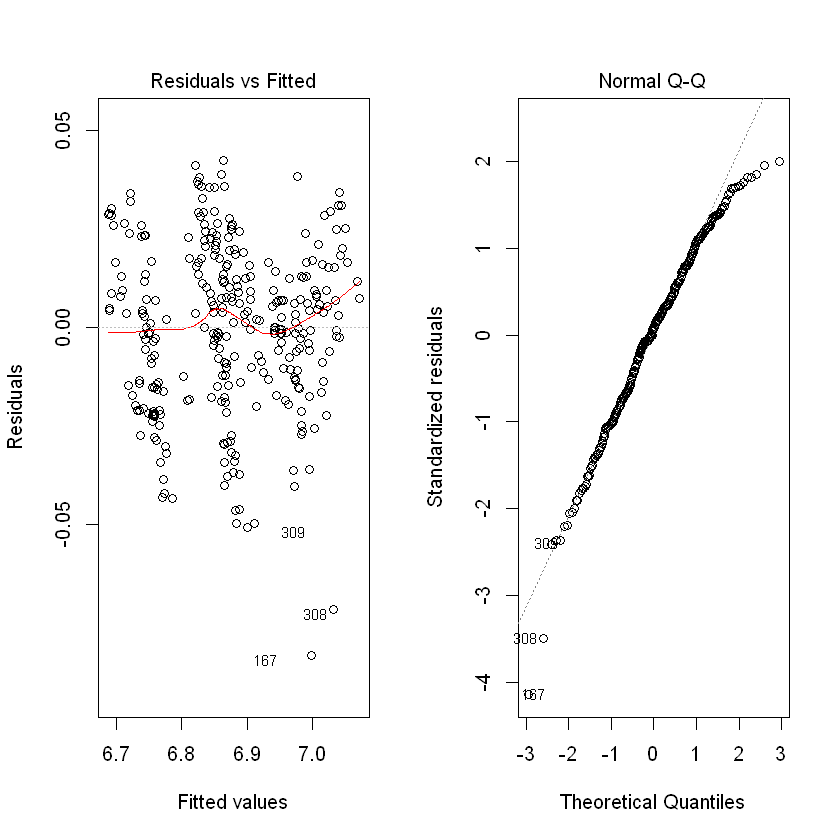

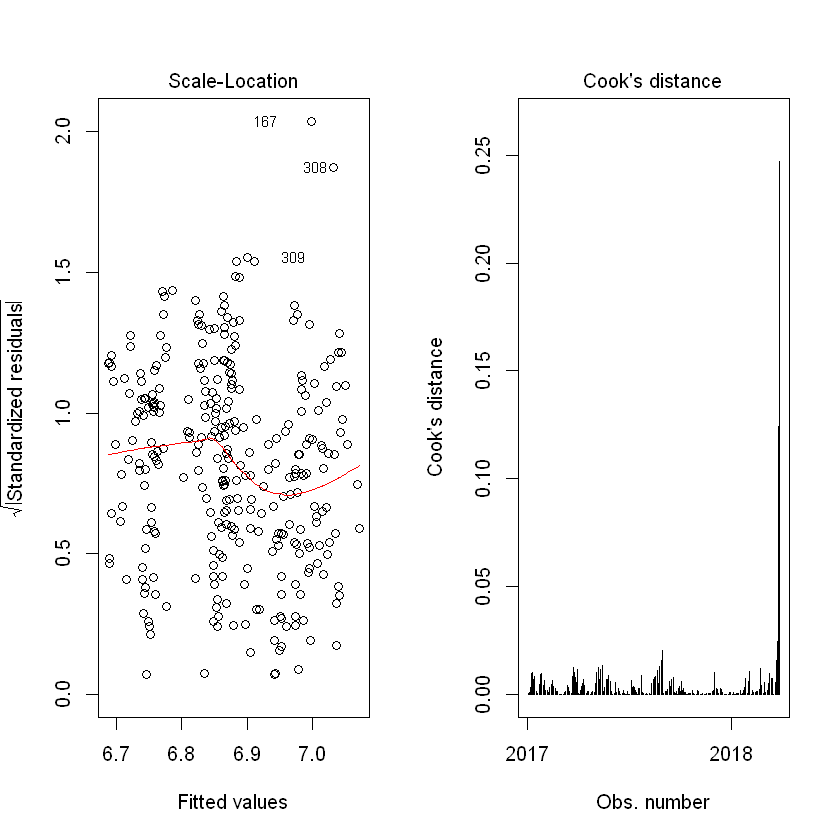

In [79]:
layout(matrix(1:2,ncol=2))
plot(models.google_optimal, which = 1)
plot(models.google_optimal, which = 2)


layout(matrix(1:2,ncol=2))
plot(models.google_optimal, which = 3)
plot(models.google_optimal, which = 4)

In [17]:
tickers = read.csv("WIKI-datasets-codes.csv", header = FALSE)
ticker_ls = c('AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS', 'HD', 'IBM', 
              'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
              'PG', 'T', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'             
             )

In [23]:
# N = length(tickers$V1)
# price = data.frame(matrix(ncol = 1, nrow = 561))

# for (i in 1:N) {
#     string = toString(ticker_ls[i])
#     print(string)
# #     ticker = substr(string, 6, nchar(string))
#     ticker = string
#     price[ticker] = quandl_get(ticker, '2016-01-01')[,4]
# }

[1] "AXP"
[1] "BA"
[1] "CAT"
[1] "CSCO"
[1] "CVX"
[1] "DD"


ERROR: Error in `[<-.data.frame`(`*tmp*`, ticker, value = structure(c(60.7534784956, : replacement has 420 rows, data has 561


In [54]:
substr("WIKI/ABC", 6, nchar("WIKI/ABC"))

[1] "ABC"

In [64]:
names(data.google)

[1] "WIKI.GOOGL - Adj. Open"   "WIKI.GOOGL - Adj. High"  
[3] "WIKI.GOOGL - Adj. Low"    "WIKI.GOOGL - Adj. Close" 
[5] "WIKI.GOOGL - Adj. Volume"

In [80]:
toString(tickers[1, 1])

[1] "WIKI/AAPL"

In [14]:
ticker_ls[1]

[1] "AXP"

In [15]:
Quandl.api_key('2ypzeYdSyDLTr3wxjG5H')
Quandl.datatable('WIKI/PRICES', date = c('1999-11-18','1999-11-19','1999-11-22'), ticker='AAPL')

ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
AAPL,1999-11-18,91.06,91.12,88.44,89.62,3257000,0,1,2.925620,2.927547,2.841443,2.879355,91196000
AAPL,1999-11-19,89.50,92.87,88.06,92.44,2790300,0,1,2.875499,2.983772,2.829234,2.969957,78128400
AAPL,1999-11-22,91.75,91.75,89.25,90.62,1806800,0,1,2.947788,2.947788,2.867467,2.911483,50590400
